<a href="https://colab.research.google.com/github/fabricio-franca/Data-Science/blob/main/LSTM_Previs%C3%A3o_de_A%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM - Previsão de *Ações*

Este script tem como objetivo prever o preço futuro de ações utilizando uma Rede Neural Recorrente LSTM (Long Short-Term Memory).

As LSTMs são particularmente adequadas para séries temporais, como dados de preços de ações,devido à sua capacidade de lembrar informações de longo prazo. O modelo será treinado em dados históricos de preços
e utilizado para fazer previsões futuras.  

O desempenho do modelo será avaliado utilizando métricas apropriadas
como o erro médio quadrático (RMSE) e a precisão da previsão.  A implementação inclui etapas de pré-processamento de dados,
como normalização, divisão em conjuntos de treino e teste, e a construção e treinamento do modelo LSTM.

O script também pode incluir a visualização dos resultados da previsão, comparando-os com os valores reais.


In [85]:
import numpy as np
import pandas as pd
import matplotlib
import tensorflow as tf
import sklearn

In [86]:
np.__version__, pd.__version__, matplotlib.__version__, tf.__version__, sklearn.__version__

('2.0.2', '2.2.2', '3.10.0', '2.18.0', '1.6.1')

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [88]:
base = pd.read_csv('petr4_treinamento.csv')
base

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
...,...,...,...,...,...,...,...
1240,2017-12-25,15.750000,15.750000,15.750000,15.750000,15.718563,0.0
1241,2017-12-26,15.750000,15.990000,15.690000,15.970000,15.938125,22173100.0
1242,2017-12-27,15.990000,16.139999,15.980000,16.049999,16.017963,23552200.0
1243,2017-12-28,16.100000,16.129999,16.000000,16.100000,16.067865,19011500.0


In [89]:
base.isnull().sum()

,0
Date,0
Open,3
High,3
Low,3
Close,3
Adj Close,3
Volume,3


In [90]:
base.shape

(1245, 7)

In [91]:
base = base.dropna()

In [92]:
base.shape

(1242, 7)

In [93]:
base_treinamento = base.iloc[:, 1:2].values

In [94]:
base_treinamento

array([[19.99    ],
       [19.809999],
       [20.33    ],
       ...,
       [15.99    ],
       [16.1     ],
       [16.1     ]])

In [95]:
normalizador = MinMaxScaler(feature_range=(0, 1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)
base_treinamento_normalizada

array([[0.76501938],
       [0.7562984 ],
       [0.78149225],
       ...,
       [0.57122093],
       [0.57655039],
       [0.57655039]])

In [96]:
base_treinamento_normalizada.shape

(1242, 1)

In [97]:
X = [] # previsores
y = [] # preço real
for i in range(90, 1242): # 90 preços anteriores
  X.append(base_treinamento_normalizada[i - 90:i, 0])
  y.append(base_treinamento_normalizada[i, 0])
  #print(i, i - 90)
X, y = np.array(X), np.array(y)

In [98]:
X.shape

(1152, 90)

In [99]:
y.shape

(1152,)

In [100]:
X[0], y[0]

(array([0.76501938, 0.7562984 , 0.78149225, 0.78875969, 0.77083338,
        0.74806197, 0.75436047, 0.75823643, 0.76598837, 0.76598837,
        0.76017437, 0.75872098, 0.75581391, 0.74467054, 0.7374031 ,
        0.7374031 , 0.73498067, 0.75242248, 0.73401163, 0.71656977,
        0.68120155, 0.67538755, 0.67635659, 0.63372098, 0.66521318,
        0.65649225, 0.64680228, 0.66618222, 0.65843028, 0.64970935,
        0.65116274, 0.66424419, 0.67344961, 0.64292631, 0.64486434,
        0.62257747, 0.60949617, 0.60998067, 0.60852713, 0.59593023,
        0.61143411, 0.60222863, 0.64922481, 0.68362398, 0.70687989,
        0.68265509, 0.70978682, 0.70784879, 0.71608527, 0.73643411,
        0.7122093 , 0.7122093 , 0.7194767 , 0.70348832, 0.69525189,
        0.70397287, 0.70397287, 0.69767442, 0.68168605, 0.68168605,
        0.65310078, 0.66618222, 0.64825581, 0.66182175, 0.64341085,
        0.67877902, 0.69137592, 0.66569772, 0.65406982, 0.64292631,
        0.64147292, 0.63565891, 0.67587209, 0.68

In [101]:
base[0:90]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
...,...,...,...,...,...,...,...
87,2013-05-10,20.160000,20.389999,19.709999,19.959999,18.681934,22031200.0
88,2013-05-13,19.809999,19.850000,19.379999,19.490000,18.242029,21577600.0
89,2013-05-14,19.530001,19.680000,19.250000,19.549999,18.298189,30643700.0
90,2013-05-15,19.500000,19.639999,19.330000,19.570000,18.316908,21869300.0


In [102]:
X.shape, X.shape[1]

((1152, 90), 90)

In [103]:
regressor = Sequential()

regressor.add(LSTM(units = 100, return_sequences=True, input_shape = (X.shape[1], 1)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units = 1, activation = 'linear'))

regressor.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 90, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 90, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 90, 50)              │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 90, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 90, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 90, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,451 (435.36 KB)

 Trainable params: 111,451 (435.36 KB)

 Non-trainable params: 0 (0.00 B)

In [104]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [105]:
regressor.fit(X, y, epochs = 100, batch_size = 64)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.1023 - mean_absolute_error: 0.2524
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.1009
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0102 - mean_absolute_error: 0.0798
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0090 - mean_absolute_error: 0.0731
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0077 - mean_absolute_error: 0.0684
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0089 - mean_absolute_error: 0.0728
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0077 - mean_absolute_error: 0.0677
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0069 - mean_absolute_error: 0.0642
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0063 - mean_absolute_error: 0.0605
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0062 - mean_absolute_error: 0.0602
Epoch 11/100
18/18 ━━━━━━━━━━

In [106]:
base_teste = pd.read_csv('petr4_teste.csv')
base_teste

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,16.190001,16.549999,16.190001,16.549999,16.516966,33461800
1,2018-01-03,16.490000,16.719999,16.370001,16.700001,16.666668,55940900
2,2018-01-04,16.780001,16.959999,16.620001,16.730000,16.696608,37064900
3,2018-01-05,16.700001,16.860001,16.570000,16.830000,16.796408,26958200
4,2018-01-08,16.740000,17.030001,16.709999,17.030001,16.996010,28400000
5,2018-01-09,17.030001,17.160000,16.959999,17.030001,16.996010,35070900
6,2018-01-10,16.920000,17.049999,16.770000,16.799999,16.766466,28547700
7,2018-01-11,16.879999,17.299999,16.840000,17.250000,17.215569,37921500
8,2018-01-12,17.040001,17.410000,17.020000,17.299999,17.265469,45912100
9,2018-01-15,17.320000,17.440001,17.150000,17.350000,17.315371,28945400


In [107]:
base_teste.shape

(22, 7)

In [108]:
y_teste = base_teste.iloc[:, 1:2].values

In [109]:
y_teste

array([[16.190001],
       [16.49    ],
       [16.780001],
       [16.700001],
       [16.74    ],
       [17.030001],
       [16.92    ],
       [16.879999],
       [17.040001],
       [17.32    ],
       [17.35    ],
       [17.92    ],
       [18.35    ],
       [18.309999],
       [18.26    ],
       [18.4     ],
       [18.42    ],
       [19.34    ],
       [19.620001],
       [19.67    ],
       [19.77    ],
       [19.74    ]])

In [110]:
base.shape

(1242, 7)

In [111]:
base_completa = pd.concat((base['Open'], base_teste['Open']), axis = 0)

In [112]:
1242 + 22

1264

In [113]:
base_completa.shape

(1264,)

In [114]:
base_completa

,Open
0,19.990000
1,19.809999
2,20.330000
3,20.480000
4,20.110001
...,...
17,19.340000
18,19.620001
19,19.670000
20,19.770000


In [115]:
len(base_completa), len(base_teste), 1264 - 22 - 90

(1264, 22, 1152)

In [116]:
112 - 90

22

In [117]:
base_completa[1152:]

,Open
1155,13.930000
1156,13.760000
1157,13.790000
1158,13.530000
1159,13.850000
...,...
17,19.340000
18,19.620001
19,19.670000
20,19.770000


In [118]:
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values

In [119]:
entradas

array([13.93    , 13.76    , 13.79    , 13.53    , 13.85    , 13.96    ,
       14.57    , 14.65    , 15.02    , 15.1     , 14.88    , 14.98    ,
       14.94    , 15.03    , 15.07    , 15.02    , 15.1     , 15.25    ,
       15.85    , 15.6     , 15.79    , 15.86    , 15.7     , 15.37    ,
       15.5     , 15.19    , 15.6     , 15.9     , 15.88    , 15.66    ,
       15.61    , 16.129999, 16.17    , 16.08    , 16.23    , 16.16    ,
       16.139999, 16.219999, 16.      , 16.190001, 16.290001, 16.290001,
       16.530001, 16.780001, 16.77    , 16.969999, 16.9     , 16.99    ,
       16.9     , 16.959999, 17.049999, 17.309999, 16.690001, 16.889999,
       16.709999, 16.690001, 16.639999, 15.35    , 15.62    , 15.92    ,
       16.02    , 16.15    , 16.09    , 15.98    , 16.25    , 16.01    ,
       15.93    , 15.87    , 15.3     , 15.34    , 15.65    , 15.5     ,
       15.22    , 15.3     , 15.51    , 15.48    , 15.36    , 15.65    ,
       15.1     , 15.05    , 15.16    , 15.18    , 

In [120]:
entradas.shape

(112,)

In [121]:
entradas = entradas.reshape(-1, 1)
entradas.shape

(112, 1)

In [122]:
entradas

array([[13.93    ],
       [13.76    ],
       [13.79    ],
       [13.53    ],
       [13.85    ],
       [13.96    ],
       [14.57    ],
       [14.65    ],
       [15.02    ],
       [15.1     ],
       [14.88    ],
       [14.98    ],
       [14.94    ],
       [15.03    ],
       [15.07    ],
       [15.02    ],
       [15.1     ],
       [15.25    ],
       [15.85    ],
       [15.6     ],
       [15.79    ],
       [15.86    ],
       [15.7     ],
       [15.37    ],
       [15.5     ],
       [15.19    ],
       [15.6     ],
       [15.9     ],
       [15.88    ],
       [15.66    ],
       [15.61    ],
       [16.129999],
       [16.17    ],
       [16.08    ],
       [16.23    ],
       [16.16    ],
       [16.139999],
       [16.219999],
       [16.      ],
       [16.190001],
       [16.290001],
       [16.290001],
       [16.530001],
       [16.780001],
       [16.77    ],
       [16.969999],
       [16.9     ],
       [16.99    ],
       [16.9     ],
       [16.959999],


In [123]:
entradas = normalizador.transform(entradas)

In [124]:
entradas

array([[0.47141473],
       [0.46317829],
       [0.46463178],
       [0.45203488],
       [0.46753876],
       [0.47286822],
       [0.50242248],
       [0.50629845],
       [0.52422481],
       [0.52810078],
       [0.51744186],
       [0.52228682],
       [0.52034884],
       [0.5247093 ],
       [0.52664729],
       [0.52422481],
       [0.52810078],
       [0.53536822],
       [0.56443798],
       [0.55232558],
       [0.56153101],
       [0.56492248],
       [0.55717054],
       [0.54118217],
       [0.54748062],
       [0.53246124],
       [0.55232558],
       [0.56686047],
       [0.56589147],
       [0.55523256],
       [0.55281008],
       [0.57800383],
       [0.57994186],
       [0.5755814 ],
       [0.58284884],
       [0.57945736],
       [0.57848832],
       [0.58236429],
       [0.57170543],
       [0.5809109 ],
       [0.58575586],
       [0.58575586],
       [0.59738377],
       [0.60949617],
       [0.60901163],
       [0.6187015 ],
       [0.61531008],
       [0.619

In [125]:
X_teste = []
for i in range(90, 112):
  #print(i)
  X_teste.append(entradas[i - 90:i, 0])

In [126]:
X_teste

[array([0.47141473, 0.46317829, 0.46463178, 0.45203488, 0.46753876,
        0.47286822, 0.50242248, 0.50629845, 0.52422481, 0.52810078,
        0.51744186, 0.52228682, 0.52034884, 0.5247093 , 0.52664729,
        0.52422481, 0.52810078, 0.53536822, 0.56443798, 0.55232558,
        0.56153101, 0.56492248, 0.55717054, 0.54118217, 0.54748062,
        0.53246124, 0.55232558, 0.56686047, 0.56589147, 0.55523256,
        0.55281008, 0.57800383, 0.57994186, 0.5755814 , 0.58284884,
        0.57945736, 0.57848832, 0.58236429, 0.57170543, 0.5809109 ,
        0.58575586, 0.58575586, 0.59738377, 0.60949617, 0.60901163,
        0.6187015 , 0.61531008, 0.61967054, 0.61531008, 0.61821701,
        0.62257747, 0.63517437, 0.60513571, 0.61482553, 0.6061046 ,
        0.60513571, 0.60271313, 0.54021318, 0.55329457, 0.56782946,
        0.57267442, 0.57897287, 0.57606589, 0.57073643, 0.58381783,
        0.57218992, 0.56831395, 0.56540698, 0.5377907 , 0.53972868,
        0.55474806, 0.54748062, 0.53391473, 0.53

In [127]:
X_teste = np.array(X_teste)
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))

In [128]:
X_teste.shape

(22, 90, 1)

In [129]:
previsoes = regressor.predict(X_teste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


In [130]:
previsoes

array([[0.58514   ],
       [0.58820087],
       [0.5920676 ],
       [0.5988995 ],
       [0.607099  ],
       [0.6142722 ],
       [0.62066805],
       [0.6253109 ],
       [0.6274274 ],
       [0.628423  ],
       [0.63123214],
       [0.6363877 ],
       [0.6462717 ],
       [0.6619786 ],
       [0.67904264],
       [0.6915568 ],
       [0.6978369 ],
       [0.6990988 ],
       [0.7045182 ],
       [0.7180797 ],
       [0.7360296 ],
       [0.75221014]], dtype=float32)

In [131]:
previsoes = normalizador.inverse_transform(previsoes)

In [132]:
previsoes.shape

(22, 1)

In [133]:
y_teste

array([[16.190001],
       [16.49    ],
       [16.780001],
       [16.700001],
       [16.74    ],
       [17.030001],
       [16.92    ],
       [16.879999],
       [17.040001],
       [17.32    ],
       [17.35    ],
       [17.92    ],
       [18.35    ],
       [18.309999],
       [18.26    ],
       [18.4     ],
       [18.42    ],
       [19.34    ],
       [19.620001],
       [19.67    ],
       [19.77    ],
       [19.74    ]])

In [134]:
previsoes.mean()

np.float32(17.655169)

In [135]:
y_teste.mean()

np.float64(17.87454563636364)

In [136]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_teste, previsoes)

0.2895102560369317

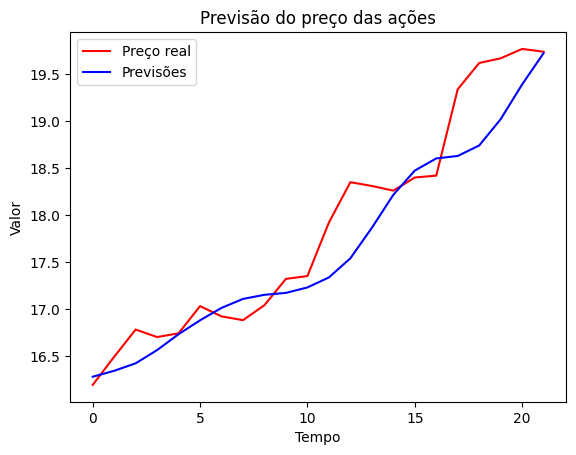

In [137]:
plt.plot(y_teste, color = "red", label = "Preço real")
plt.plot(previsoes, color = "blue", label = "Previsões")
plt.title("Previsão do preço das ações")
plt.xlabel("Tempo")
plt.ylabel("Valor")
plt.legend();